# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.neighbors import NearestNeighbors

from acquire import acquire_imdb

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/jivemachine/projects/content-based-recommender/acquire.py:12: UserWarning: Warning Simulation
  warn("Warning Simulation")


# Acquiring the data

In [2]:
movies = acquire_imdb()

In [3]:
movies = movies.drop(columns=['Unnamed: 0'])
movies

,movie,year,imdb_rating,metascore,votes
0,Gladiator,2000,8.5,67,1303010
1,Memento,2000,8.4,80,1094116
2,Snatch,2000,8.3,55,764076
3,Requiem for a Dream,2000,8.3,68,745754
4,X-Men,2000,7.4,64,560582
...,...,...,...,...,...
3611,Godzilla: King of the Monsters,2019,6.0,48,123913
3612,Rocketman,2019,7.3,69,122615
3613,Frozen II,2019,6.9,64,120171
3614,Zombieland: Double Tap,2019,6.7,55,120142


# Exploring the data

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie        3616 non-null   object 
 1   year         3616 non-null   int64  
 2   imdb_rating  3616 non-null   float64
 3   metascore    3616 non-null   int64  
 4   votes        3616 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 141.4+ KB


### What year has the highest rated movies?

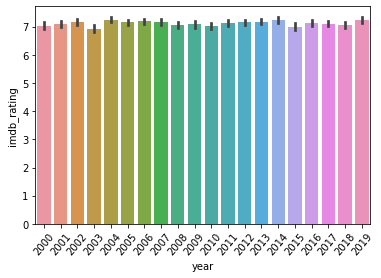

In [31]:
y = 'imdb_rating'
x = 'year'
sns.barplot(x=x, y=y, data=movies)
plt.xticks(rotation=50)
plt.show()

Unclear, some years are still blurry because the bars are too close

In [33]:
year = movies[['year','imdb_rating']]

In [40]:
year.groupby('year').imdb_rating.mean().sort_values(ascending=False).head(1)

year
2004    7.25625
Name: imdb_rating, dtype: float64

2004 has the highest mean average imdb movie scores

### What about metacritic scores?

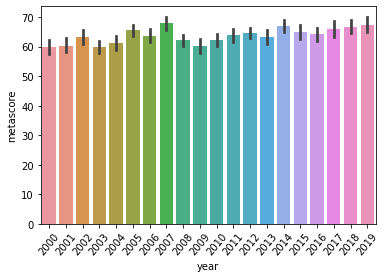

In [42]:
y = 'metascore'
x = 'year'
sns.barplot(x=x, y=y, data=movies)
plt.xticks(rotation=50)
plt.show()

2007 looks like the clear winner in this chart, lets look into the numbers more

In [43]:
yearly_metascore = movies[['year', 'metascore']]

In [45]:
yearly_metascore.groupby('year').metascore.mean().sort_values(ascending=False).head(1)

year
2007    67.931818
Name: metascore, dtype: float64

## What if we used median instead of mean?

#### IMDB score by year

In [46]:
med_year = movies[['year','imdb_rating']]

In [49]:
med_year.groupby('year').imdb_rating.median().sort_values(ascending=False).head(1)

year
2014    7.4
Name: imdb_rating, dtype: float64

#### Metascore by year

In [50]:
med_yearly_metascore = movies[['year', 'metascore']]

In [52]:
med_yearly_metascore.groupby('year').metascore.median().sort_values(ascending=False).head()

year
2019    69.0
2014    69.0
2007    68.5
2005    68.5
2017    68.0
Name: metascore, dtype: float64

#### mean imdb_rating by year
- 2004 | 7.25625

#### mean metascore by year
- 2007 | 67.931818

#### median imdb_rating by year
- 2014 | 7.4

#### median metascore by year (tie)
- 2019 | 69.0
- 2014 | 69.0

# Modeling

In [53]:
movies.shape

(3616, 5)

Customer: "I wanna see a movie with a high rating."

In [54]:
# we choose a movie with a 9.5 imdb rating
# and a 95 metacritic rating
t = [10, 100]

# we only include the rows containing imdb and metacritic scores
x = movies.iloc[:, 2:4].values
x[0:5]

array([[ 8.5, 67. ],
       [ 8.4, 80. ],
       [ 8.3, 55. ],
       [ 8.3, 68. ],
       [ 7.4, 64. ]])

In [ ]:
# finding the 1 closest datapoint using KNN
nbrs = NearestNeighbors(n_neighbors=1).fit(x)

In [ ]:
# throwing in our object t (test point)
print(nbrs.kneighbors([t]))

In [ ]:
movies.iloc[2638]

KNN recommends this ^ movie